In [1]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("Iris.csv")
df = data.copy()

In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [29]:
df_final = df.drop(["Id","Species"],axis=1)

In [6]:
df_final.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [9]:
df_final.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Exploraty Data Analysis

<Axes: xlabel='PetalWidthCm'>

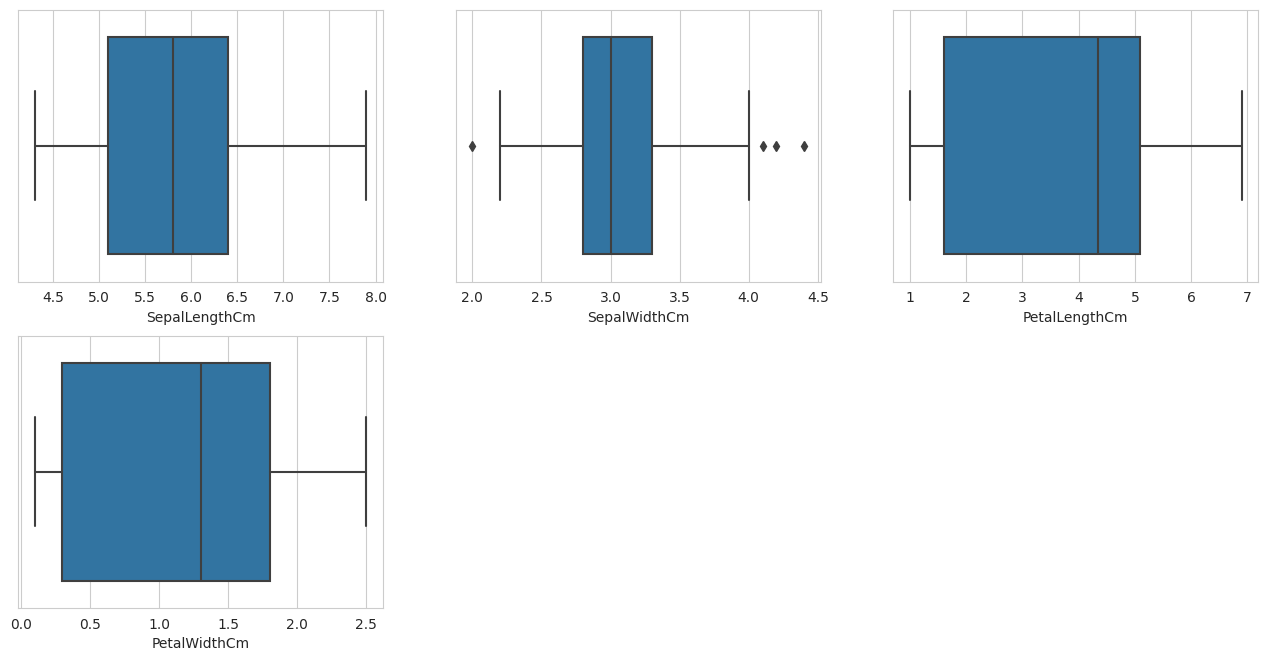

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='SepalLengthCm',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='SepalWidthCm',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='PetalLengthCm',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='PetalWidthCm',data=df)



In [30]:
def outlier_treatment(data_c):
    sorted(data_c)
    Q1, Q3 = np.percentile(data_c,[25,75])
    IQR = Q3- Q1
    lower_range = Q1- (1.5*IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,  upper_range

for col in df.columns :
    lower, upper = outlier_treatment(df_final["SepalWidthCm"])
    df_final["SepalWidthCm"] = np.clip(df_final["SepalWidthCm"],a_min =lower, a_max =upper)

<Axes: xlabel='PetalWidthCm'>

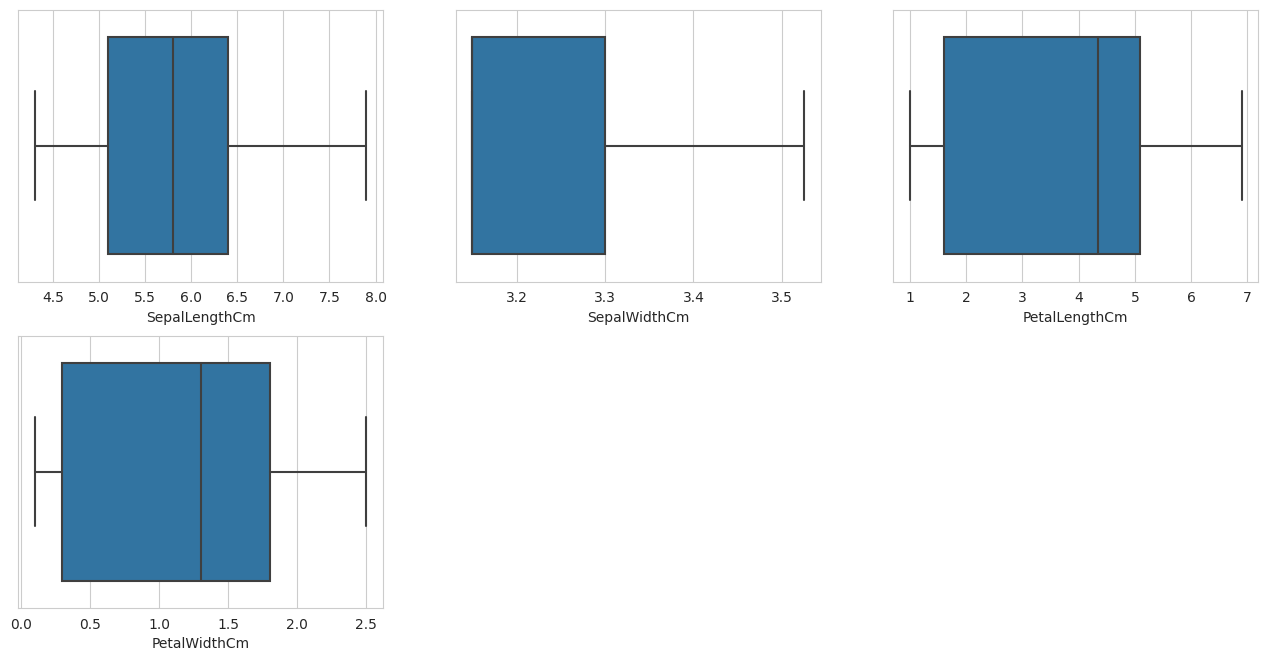

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='SepalLengthCm',data=df_final)
plt.subplot(3,3,2)
sns.boxplot(x='SepalWidthCm',data=df_final)
plt.subplot(3,3,3)
sns.boxplot(x='PetalLengthCm',data=df_final)
plt.subplot(3,3,4)
sns.boxplot(x='PetalWidthCm',data=df_final)

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()


In [27]:
# df_col = df_final.columns
# df_final = scaler.fit_transform(df_final)
# df_final = pd.DataFrame(df_final,columns=df_col)

In [17]:
df_final

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.847296,-1.341272,-1.312977
1,-1.143017,-0.633089,-1.341272,-1.312977
2,-1.385353,-0.278748,-1.398138,-1.312977
3,-1.506521,-0.633089,-1.284407,-1.312977
4,-1.021849,2.024467,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.633089,0.819624,1.447956
146,0.553333,-0.633089,0.705893,0.922064
147,0.795669,-0.633089,0.819624,1.053537
148,0.432165,1.138615,0.933356,1.447956


In [20]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

KMeans

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=41).fit(df_final)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [39]:
df["KMeans_cluster"]= kmeans.labels_
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans_cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,2
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,2
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,2
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,2


In [45]:
df["Classes"]= df["Species"].replace(["Iris-setosa","Iris-virginica","Iris-versicolor"],[1,0,2])

In [46]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans_cluster,Classes
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0


In [47]:
y_pred = df["KMeans_cluster"]
y_test = df["Classes"]


In [49]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        50
           1       1.00      1.00      1.00        50
           2       0.77      0.96      0.86        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [50]:
accuracy_score(y_test,y_pred)

0.8933333333333333

Hierachial clustering

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
dendogram = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")

In [56]:
df_new = df.iloc[:,1:5]
df_new



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
labels = dendogram.fit_predict(df_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [59]:
from sklearn.preprocessing import RobustScaler

In [60]:
scaler = RobustScaler()
df_col = df_new.columns
df_new = scaler.fit_transform(df_new)
df_new = pd.DataFrame(df_new,columns=df_col)

In [61]:
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [64]:
df["Hierachial_clustering"]=labels

In [65]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans_cluster,Classes,Hierachial_clustering
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1,1
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,0,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0,2


In [67]:
df["Hierachial_clustering"] =df["Hierachial_clustering"].replace([0,2],[2,0])

In [68]:
y_hc = df["Hierachial_clustering"]
print(classification_report(y_hc,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      1.00      1.00        50
           2       1.00      0.97      0.98        64

    accuracy                           0.99       150
   macro avg       0.98      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

